Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data= pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [51]:
def norm_func(i):
    x = (i-i.min())/(i.max()- i.min())
    return (x) 

In [52]:
data_norm = norm_func(data.iloc[:,1:])
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Hierarchical Clustering

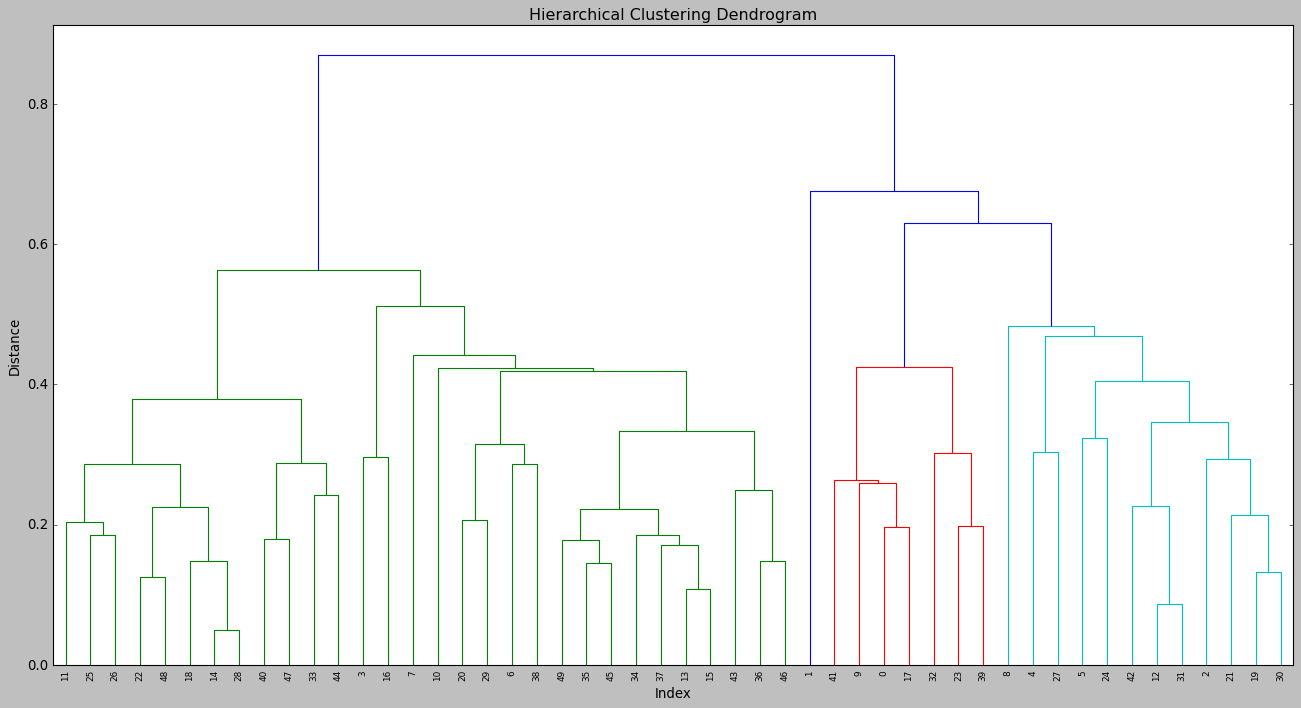

In [53]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method="average", metric="euclidean")
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=5, linkage="average", affinity="euclidean").fit(data_norm)   

In [56]:
cluster_labels= pd.Series(h_complete.labels_)
cluster_labels

0     3
1     2
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     3
10    0
11    4
12    1
13    0
14    4
15    0
16    0
17    3
18    4
19    1
20    0
21    1
22    4
23    3
24    1
25    4
26    4
27    1
28    4
29    0
30    1
31    1
32    3
33    4
34    0
35    0
36    0
37    0
38    0
39    3
40    4
41    3
42    1
43    0
44    4
45    0
46    0
47    4
48    4
49    0
dtype: int64

In [62]:
cl=pd.DataFrame(cluster_labels,columns=['h_cluster']) 
cl 

,h_cluster
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [63]:
data1 = pd.concat([data,cl],axis=1)  
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [68]:
data1.iloc[:,1:].groupby(data1.h_cluster).mean() 

,Murder,Assault,UrbanPop,Rape,h_cluster
h_cluster,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,10.000000,263.000000,48.000000,44.500000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,3.091667,76.000000,52.083333,11.833333,4.0


In [67]:
data1.iloc[:,1:].groupby(data1.h_cluster).median()

,Murder,Assault,UrbanPop,Rape,h_cluster
h_cluster,,,,,
0,6.15,147.0,72.0,19.15,0.0
1,11.20,254.5,80.0,31.45,1.0
2,10.00,263.0,48.0,44.50,2.0
3,14.40,249.0,58.0,22.20,3.0
4,2.60,76.5,53.5,11.25,4.0


In [69]:
df = data[(data1.h_cluster==0)]
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
3,Arkansas,8.8,190,50,19.5
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
10,Hawaii,5.3,46,83,20.2
13,Indiana,7.2,113,65,21.0
15,Kansas,6.0,115,66,18.0
16,Kentucky,9.7,109,52,16.3
20,Massachusetts,4.4,149,85,16.3
29,New Jersey,7.4,159,89,18.8
34,Ohio,7.3,120,75,21.4


In [70]:
df = data[(data1.h_cluster==1)]
df 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
2,Arizona,8.1,294,80,31.0
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
8,Florida,15.4,335,80,31.9
12,Illinois,10.4,249,83,24.0
19,Maryland,11.3,300,67,27.8
21,Michigan,12.1,255,74,35.1
24,Missouri,9.0,178,70,28.2
27,Nevada,12.2,252,81,46.0
30,New Mexico,11.4,285,70,32.1


In [71]:
df = data[(data1.h_cluster==2)]
df 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5


In [72]:
df = data[(data1.h_cluster==3)]
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
9,Georgia,17.4,211,60,25.8
17,Louisiana,15.4,249,66,22.2
23,Mississippi,16.1,259,44,17.1
32,North Carolina,13.0,337,45,16.1
39,South Carolina,14.4,279,48,22.5
41,Tennessee,13.2,188,59,26.9


In [73]:
df = data[(data1.h_cluster==4)]
df 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
11,Idaho,2.6,120,54,14.2
14,Iowa,2.2,56,57,11.3
18,Maine,2.1,83,51,7.8
22,Minnesota,2.7,72,66,14.9
25,Montana,6.0,109,53,16.4
26,Nebraska,4.3,102,62,16.5
28,New Hampshire,2.1,57,56,9.5
33,North Dakota,0.8,45,44,7.3
40,South Dakota,3.8,86,45,12.8
44,Vermont,2.2,48,32,11.2


# K- Means clustering

In [74]:
from sklearn.cluster import KMeans 

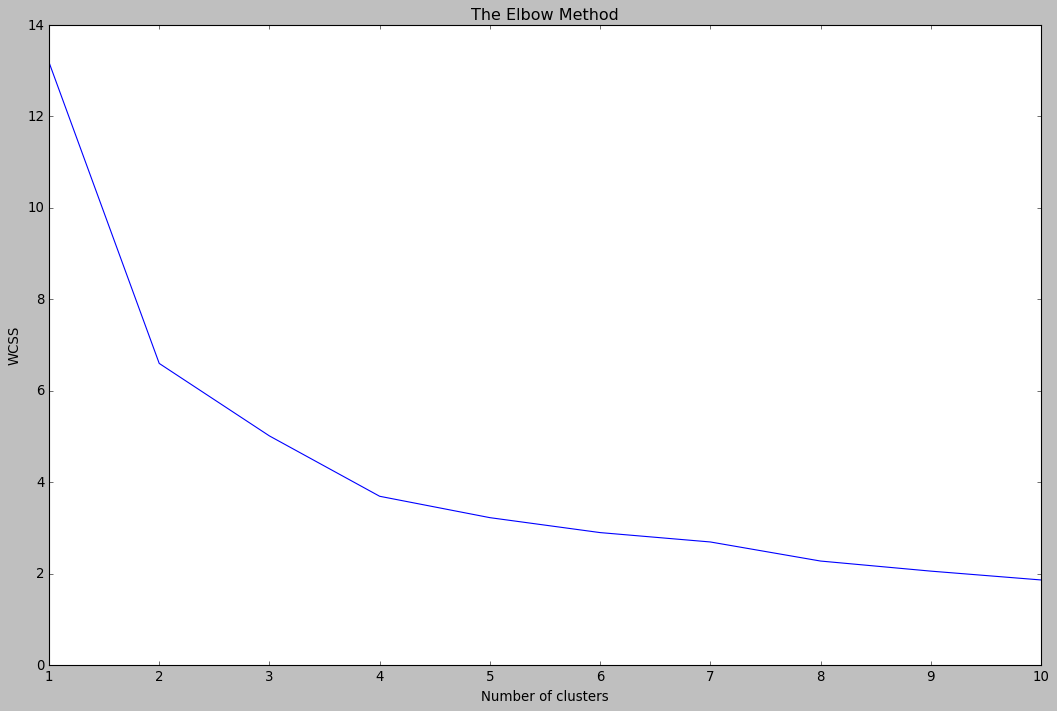

In [79]:
fig= plt.figure(figsize=(16,10))
WCSS= []
for i in range(1,11):
    clf= KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  

In [80]:
clf= KMeans(n_clusters=4)
kmeans_cluster= clf.fit_predict(data_norm) 

In [81]:
kmeans_cluster

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 1, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [87]:
cl2=pd.DataFrame(kmeans_cluster,columns=['kmeans_cluster'])
cl2

,kmeans_cluster
0,3
1,2
2,2
3,3
4,2
5,2
6,1
7,1
8,2
9,3


In [84]:
clf.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [85]:
clf.inertia_ #WCSS at k=4

3.6834561535859143

In [92]:
data2 = pd.concat([data,cl2],axis=1)  
data2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,kmeans_cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,3


In [93]:
data2.iloc[:,1:].groupby(data2.kmeans_cluster).mean()

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
kmeans_cluster,,,,,
0,3.600000,78.538462,52.076923,12.176923,0.0
1,5.852941,141.176471,73.647059,19.335294,1.0
2,10.966667,264.000000,76.500000,33.608333,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0


In [94]:
data2.iloc[:,1:].groupby(data2.kmeans_cluster).median()

,Murder,Assault,UrbanPop,Rape,kmeans_cluster
kmeans_cluster,,,,,
0,2.6,81.0,53.0,11.3,0.0
1,6.0,149.0,72.0,20.0,1.0
2,11.2,259.0,80.0,32.0,2.0
3,13.8,242.5,54.0,21.7,3.0


In [95]:
WCSS

[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.690820410392112,
 3.223208055249011,
 2.896456769124099,
 2.691408143673855,
 2.273989859991304,
 2.0535174567278296,
 1.8604400803440275]

In [96]:
df = data[(data2.kmeans_cluster==0)]
df 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
11,Idaho,2.6,120,54,14.2
14,Iowa,2.2,56,57,11.3
16,Kentucky,9.7,109,52,16.3
18,Maine,2.1,83,51,7.8
22,Minnesota,2.7,72,66,14.9
25,Montana,6.0,109,53,16.4
26,Nebraska,4.3,102,62,16.5
28,New Hampshire,2.1,57,56,9.5
33,North Dakota,0.8,45,44,7.3
40,South Dakota,3.8,86,45,12.8


In [97]:
df = data[(data2.kmeans_cluster==1)]
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
10,Hawaii,5.3,46,83,20.2
13,Indiana,7.2,113,65,21.0
15,Kansas,6.0,115,66,18.0
20,Massachusetts,4.4,149,85,16.3
24,Missouri,9.0,178,70,28.2
29,New Jersey,7.4,159,89,18.8
34,Ohio,7.3,120,75,21.4
35,Oklahoma,6.6,151,68,20.0


In [98]:
df = data[(data2.kmeans_cluster==2)]
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
8,Florida,15.4,335,80,31.9
12,Illinois,10.4,249,83,24.0
19,Maryland,11.3,300,67,27.8
21,Michigan,12.1,255,74,35.1
27,Nevada,12.2,252,81,46.0
30,New Mexico,11.4,285,70,32.1


In [99]:
df = data[(data2.kmeans_cluster==3)]
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
3,Arkansas,8.8,190,50,19.5
9,Georgia,17.4,211,60,25.8
17,Louisiana,15.4,249,66,22.2
23,Mississippi,16.1,259,44,17.1
32,North Carolina,13.0,337,45,16.1
39,South Carolina,14.4,279,48,22.5
41,Tennessee,13.2,188,59,26.9


In [100]:
data3=pd.concat([data1,cl2],axis=1)
data3 #for comparing hierarchical and k means clustering

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster,kmeans_cluster
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,2,2
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,0,3
4,California,9.0,276,91,40.6,1,2
5,Colorado,7.9,204,78,38.7,1,2
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,1,2
9,Georgia,17.4,211,60,25.8,3,3


# DBSCAN

In [101]:
from sklearn.cluster import DBSCAN

In [102]:
from sklearn.neighbors import NearestNeighbors

In [103]:
neigh = NearestNeighbors(n_neighbors=8) #n_neighbors=2n, where n=no. of dimensions i.e., 4 
nbrs = neigh.fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm) 

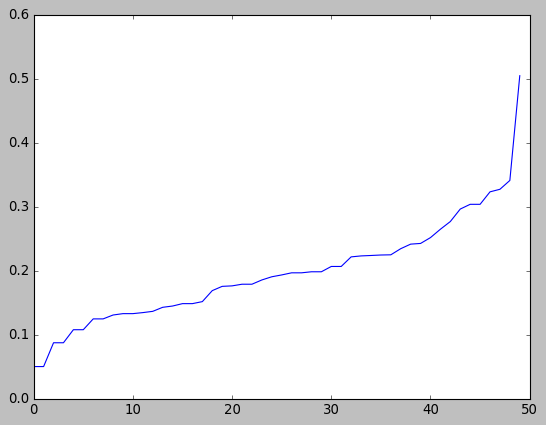

In [104]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

eps=0.34 approximatey

In [189]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(data_norm) 

DBSCAN(eps=0.3)

In [190]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [191]:
cl3=pd.DataFrame(dbscan.labels_,columns=['db_cluster'])

In [192]:
cl3

,db_cluster
0,0
1,-1
2,-1
3,1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [193]:
data4 = pd.concat([data,cl3],axis=1)  
data4  

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,db_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [194]:
import matplotlib.pyplot as plt
plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

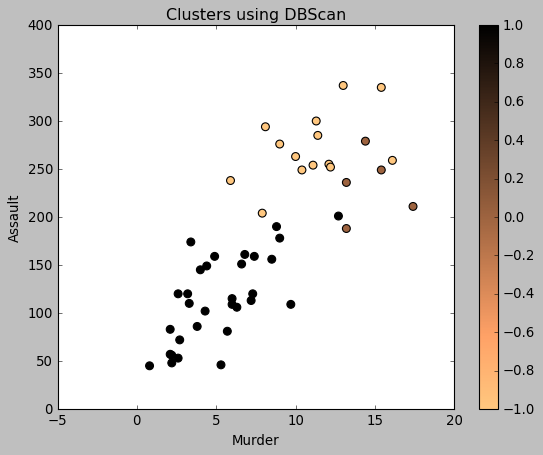

In [195]:
df1.plot(x="Murder",y ="Assault",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')

In [196]:
dl = dbscan.labels_

In [197]:
import sklearn
sklearn.metrics.silhouette_score(data_norm, dl) 

0.28111691272255096